In [13]:
from nltk import PorterStemmer
stemmer = PorterStemmer()


def removeStopWords(stopwords, list):
    return([word for word in list if word not in stopwords])

def tokenise(words, string):
    string = clean(string)
    words = string.split(" ")
    return ([stemmer.stem(word,0,len(word)-1) for word in words])

In [175]:

def parse_raw(text_path): # find better solution for large scale texts (batch reading from os)
    with open(text_path) as f:
        contents = f.read()
        contents = contents.replace('\n', '')
        
        sentences = contents.split(sep='.')
        sentences = [s.strip() for s in sentences]
        
        sentences_cut = [s.split(sep=' ') for s in sentences]
        for i, s in enumerate(sentences_cut):
            sentences_cut[i] = [word.strip(' ,.\'') for word in s]
            
        # prepare accordingly
        # https://www.quora.com/Why-should-punctuation-be-removed-in-Word2vec
        
        return sentences_cut
    
sentences = parse_raw('sample_text.txt')

#print(sentences[:2])

import functools

print(functools.reduce(lambda a,b : a+b, [len(s) for s in sentences]))

1036


In [27]:
import gensim
model = gensim.models.Word2Vec(sentences, min_count=1, workers=4)
model.train(sentences, total_examples=len(sentences), epochs=1)

(727, 1036)

In [32]:
sims = model.wv.most_similar('hover', topn=10) 
print(sims)

[('period', 0.28260594606399536), ('month', 0.2653523087501526), ('she', 0.2639887034893036), ('A', 0.24994871020317078), ('I', 0.23322921991348267), ('need', 0.2283715009689331), ('shoes', 0.21890905499458313), ('now', 0.21590036153793335), ('saw', 0.21489177644252777), ('understand', 0.2122129201889038)]


In [37]:
model.wv.most_similar(positive=['inch', 'she'], negative=['two'], topn=1)

[('herself', 0.351097047328949)]

In [ ]:
#TODO -> input prep => check if word2vec has its parse methods
#TODO -> download long text to study

In [2]:
from gensim.models import Word2Vec
from nltk.corpus import brown

b = Word2Vec(brown.sents())

-----------------------


Tokenizing into sentences


In [68]:
import nltk
tokenizer_pl = nltk.data.load('tokenizers/punkt/polish.pickle')
text = 'To przykładowy tekst w języku polskim. Marek wyszedł po schodach i otworzył drzwi do swojego mieszkania. W tej chwili dotarło do niego, co tak naprawdę zrobił.'
res = tokenizer_pl.tokenize(text)
for w in res:
    print(w)

To przykładowy tekst w języku polskim.
Marek wyszedł po schodach i otworzył drzwi do swojego mieszkania.
W tej chwili dotarło do niego, co tak naprawdę zrobił.


Tokenizing into words

In [69]:
from nltk.tokenize import word_tokenize

word_res = [word_tokenize(s) for s in res]
print(word_res)

[['To', 'przykładowy', 'tekst', 'w', 'języku', 'polskim', '.'], ['Marek', 'wyszedł', 'po', 'schodach', 'i', 'otworzył', 'drzwi', 'do', 'swojego', 'mieszkania', '.'], ['W', 'tej', 'chwili', 'dotarło', 'do', 'niego', ',', 'co', 'tak', 'naprawdę', 'zrobił', '.']]


POS tagging

In [70]:
import nltk 
pl196x_dir = nltk.data.find('corpora/pl196x')
print(pl196x_dir)

C:\Users\Kamil\AppData\Roaming\nltk_data\corpora\pl196x


In [71]:
from nltk.corpus.reader import pl196x
pl_reader = pl196x.Pl196xCorpusReader(pl196x_dir, r'.*\.xml', textids='textids.txt', cat_file="cats.txt")

In [31]:
#Look at tagged words
twords = pl_reader.tagged_words(fileids=pl_reader.fileids(),categories='cats.txt')
for w in twords[:2]:
    print(w)

('Sztuka', 'SSNF---------P')
('utraciła', 'VS-F-3POD----P')


In [72]:
pl_sentences = pl_reader.tagged_sents(fileids=pl_reader.fileids(),categories='cats.txt')
unigram__tagger = nltk.UnigramTagger(pl_sentences)

In [74]:
text = [j for sub in word_res for j in sub]
unigram__tagger.tag(text)[:5]

[('To', 'Z-N-------XX-P'),
 ('przykładowy', None),
 ('tekst', 'SSAI---------P'),
 ('w', 'P-L----------P'),
 ('języku', 'SSLI---------P')]

In [78]:
from stempel import StempelStemmer
stemmer = StempelStemmer.default()
# stemmer = StempelStemmer.polimorf()

Loading: 100%|██████████| 2225192/2225192 [00:01<00:00, 1223304.63bytes/s]


In [82]:
for word in text[:6]:
    print(stemmer.stem(word))


To
przykładowy
tekst
w
język
polski


In [88]:
import morfeusz2
lemmatizer = morfeusz2.Morfeusz()

for word in text:
    print(lemmatizer.analyse(word))
    print()

[(0, 1, ('To', 'to:T', 'part', [], [])), (0, 1, ('To', 'to:M', 'comp', [], [])), (0, 1, ('To', 'ten', 'adj:sg:acc:n:pos', [], [])), (0, 1, ('To', 'ten', 'adj:sg:nom.voc:n:pos', [], [])), (0, 1, ('To', 'to:V', 'pred', [], [])), (0, 1, ('To', 'to:S', 'subst:sg:nom:n:ncol', [], [])), (0, 1, ('To', 'to:S', 'subst:sg:acc:n:ncol', [], []))]

[(0, 1, ('przykładowy', 'przykładowy', 'adj:sg:acc:m3:pos', [], [])), (0, 1, ('przykładowy', 'przykładowy', 'adj:sg:nom.voc:m1.m2.m3:pos', [], []))]

[(0, 1, ('tekst', 'tekst', 'subst:sg:nom.acc:m3', ['nazwa_pospolita'], []))]

[(0, 1, ('w', 'w', 'prep:acc:nwok', [], [])), (0, 1, ('w', 'w', 'prep:loc:nwok', [], []))]

[(0, 1, ('języku', 'język', 'subst:sg:loc:m3', ['nazwa_pospolita'], [])), (0, 1, ('języku', 'język', 'subst:sg:voc:m3', ['nazwa_pospolita'], []))]

[(0, 1, ('polskim', 'polski:S', 'subst:sg:inst:m3', ['nazwa_pospolita'], [])), (0, 1, ('polskim', 'polski:S', 'subst:sg:loc:m3', ['nazwa_pospolita'], [])), (0, 1, ('polskim', 'polski:S', 'subst:

-------------------------------

In [65]:
import pandas as pd

df = pd.read_csv('dataset/train_data.txt', sep=" ::: ", header=None)

df.drop([0], axis=1, inplace=True)
df.rename(columns={1: 'title', 2: 'genre', 3: 'description'}, inplace=True)
df = df[["title", "description", "genre"]]

C:\Users\Kamil\AppData\Local\Temp\ipykernel_2656\2958472327.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('dataset/train_data.txt', sep=" ::: ", header=None)


In [66]:
df.sample(5)

,title,description,genre
43772,The Creator's Game (2015/II),The game of lacrosse was invented in America l...,documentary
11861,Stan the Man (2018),"""STAN MANN"" (STEVEN CHASE), a new money, multi...",romance
46463,The Prince Who Was a Thief (1951),"In 13th-century Tangiers, regent Mustapha cove...",adventure
18920,Kaal Ratri (1997),'Kaal Ratri' is the story of a cursed night on...,drama
13946,Nuclear Family (2012),Nuclear Family begins the story of a young cou...,sci-fi


In [67]:
df['genre'].unique()

array(['drama', 'thriller', 'adult', 'documentary', 'comedy', 'crime',
       'reality-tv', 'horror', 'sport', 'animation', 'action', 'fantasy',
       'short', 'sci-fi', 'music', 'adventure', 'talk-show', 'western',
       'family', 'mystery', 'history', 'news', 'biography', 'romance',
       'game-show', 'musical', 'war'], dtype=object)

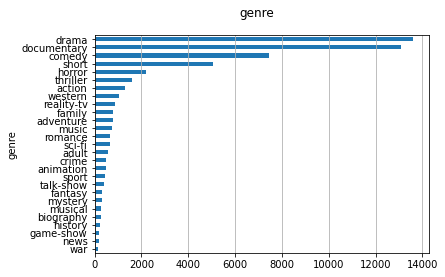

In [68]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.suptitle("genre", fontsize=12)
df["genre"].reset_index().groupby("genre").count().sort_values(by="index").plot(kind="barh", legend=False, ax=ax).grid(axis='x')
plt.show()

In [69]:
import nltk

def preprocess_text(text, stemm=False, lemm=True, stopwords=None): # process one sentence
    # lowercase -> strip -> tokenize -> remove stopwords -> stemm / lemm -> untokenize 

    # lower & strip
    text = text.lower().strip()
            
    # tokenize (convert from string to list)
    text_tokens = text.split()
    
    # remove stopwords
    if stopwords is not None:
        text_tokens = [word for word in text_tokens if word not in stopwords]
                
    ## stemming
    if stemm:
        ps = nltk.stem.porter.PorterStemmer()
        text_tokens = [ps.stem(word) for word in text_tokens]
                
    # lemmatisation 
    if lemm:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        text_tokens = [lem.lemmatize(word) for word in text_tokens]
            
    # back to string from list
    text = " ".join(text_tokens)
    return text

In [70]:
nltk_stopwords = nltk.corpus.stopwords.words("english")
nltk_stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [71]:
df['description'][1]

'A brother and sister with a past incestuous relationship have a current murderous relationship. He murders the women who reject him and she murders the women who get too close to him.'

In [72]:
preprocess_text(df['description'][1], stopwords=nltk_stopwords)

'brother sister past incestuous relationship current murderous relationship. murder woman reject murder woman get close him.'

In [73]:
df["processed"] = df["description"].apply(lambda x: preprocess_text(x, stopwords=nltk_stopwords))

In [74]:
df.head()

,title,description,genre,processed
0,Oscar et la dame rose (2009),Listening in to a conversation between his doc...,drama,"listening conversation doctor parents, 10-year..."
1,Cupid (1997),A brother and sister with a past incestuous re...,thriller,brother sister past incestuous relationship cu...
2,"Young, Wild and Wonderful (1980)",As the bus empties the students for their fiel...,adult,bus empty student field trip museum natural hi...
3,The Secret Sin (1915),To help their unemployed father make ends meet...,drama,"help unemployed father make end meet, edith tw..."
4,The Unrecovered (2007),The film's title refers not only to the un-rec...,drama,film's title refers un-recovered body ground z...


In [75]:
from sklearn import model_selection

# split dataset
df_train, df_test = model_selection.train_test_split(df, test_size=0.3)
# get target
y_train = df_train["genre"].values
y_test = df_test["genre"].values

### Prepare corpus for word2vec training


In [76]:
processed = df_train["processed"]

def tokenize_text(text_or_path, file_input=False): # find better solution for large scale texts (batch reading from os)
   
   text = ''
   if file_input:
      with open(text_or_path) as f:
         text = f.read()
         text = text.replace('\n', '')
   else:
      text = text_or_path
         
   # tokenize text to sentences
   sentences = text.split(sep='.')
   sentences = [s.strip() for s in sentences]
   
   # tokenize sentences to words
   sentences_tokenized = [s.split(sep=' ') for s in sentences]
   
   for i, s in enumerate(sentences_tokenized):
      sentences_tokenized[i] = [word.strip('!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n') for word in s]
      
   return sentences_tokenized

corpus_tokenized = tokenize_text(' '.join(processed))
corpus_tokenized[1]

['conclusion', 'based', 'morality', 'decency', 'normal', 'human', 'behavior']

fitting word2vec

In [77]:
import gensim
nlp = gensim.models.word2vec.Word2Vec(sentences=corpus_tokenized, vector_size=300, window=8, workers=4, sg=1, epochs=30) # sg: 1-skip gram 0-cbow

In [78]:
nlp.save("word2vec.model")

In [79]:
#loading cell
load = False
if load:
    nlp = Word2Vec.load("word2vec.model")

In [103]:
nlp.wv['man'][:10]

array([ 0.01244565,  0.3538508 , -0.04299857,  0.26128197,  0.02909735,
       -0.23122276,  0.13456626, -0.13313282,  0.0038695 , -0.11289892],
      dtype=float32)

# visualisation

In [81]:
from sklearn import manifold



c:\source\ai-nlp\env\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\source\ai-nlp\env\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Kamil\AppData\Local\Temp\ipykernel_2656\1038844405.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf_["input"].iloc[0:1] = 1


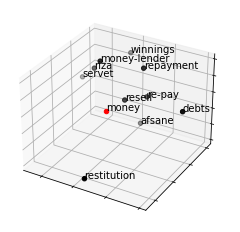

In [94]:
word = "money"
fig = plt.figure()
## word embedding
tot_words = [word] + [tupla[0] for tupla in nlp.wv.most_similar(word, topn=10)]
X = nlp.wv[tot_words]

## pca to reduce dimensionality from 300 to 3
pca = manifold.TSNE(perplexity=40, n_components=3, init='pca')
X = pca.fit_transform(X)
## create dtf
dtf_ = pd.DataFrame(X, index=tot_words, columns=["x","y","z"])
dtf_["input"] = 0
dtf_["input"].iloc[0:1] = 1
## plot 3d
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dtf_[dtf_["input"]==0]['x'], 
           dtf_[dtf_["input"]==0]['y'], 
           dtf_[dtf_["input"]==0]['z'], c="black")
ax.scatter(dtf_[dtf_["input"]==1]['x'], 
           dtf_[dtf_["input"]==1]['y'], 
           dtf_[dtf_["input"]==1]['z'], c="red")
ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], 
       yticklabels=[], zticklabels=[])
for label, row in dtf_[["x","y","z"]].iterrows():
    x, y, z = row
    ax.text(x, y, z, s=label)

### TRANSFORM PREPROCESSED CORPUS INTO LIST OF SEQUENCES

In [83]:
from tensorflow.keras import preprocessing as k_preprocessing

# tokenize vocab
tokenizer = k_preprocessing.text.Tokenizer(lower=True, split=' ', oov_token="NaN", 
                                       filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(corpus_tokenized)
dic_vocabulary = tokenizer.word_index

In [84]:
print(len(dic_vocabulary.keys()))

for key in list(dic_vocabulary.keys())[50:60]:
    print(key, dic_vocabulary[key])


127511
town 51
see 52
house 53
series 54
end 55
daughter 56
tell 57
place 58
together 59
death 60


In [97]:
# create sequence
lst_text2seq = tokenizer.texts_to_sequences(corpus_tokenized)
lst_text2seq[:2]

[[1535, 770, 1746, 130, 2007, 14804, 2886],
 [2886, 191, 5074, 12990, 1084, 137, 1357]]

In [100]:
# padding sequence
X_train = k_preprocessing.sequence.pad_sequences(lst_text2seq, 
                    maxlen=15, padding="post", truncating="post")
X_train

array([[  1535,    770,   1746, ...,      0,      0,      0],
       [  2886,    191,   5074, ...,      0,      0,      0],
       [   137,   1357,     28, ...,  10246,    238,      0],
       ...,
       [  6288,   3936,   2179, ...,      0,      0,      0],
       [ 34255,      6,  10692, ...,     13,   2977, 127511],
       [     2,      0,      0, ...,      0,      0,      0]])